In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, f1_score

### Область работы 2 (поиск  модели .... )

In [2]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

df = pd.read_csv(path_train)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,7
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,7
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,5
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,7
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,6.9,0.39,0.22,4.3,0.030,10.0,102.0,0.99300,3.00,0.87,11.6,4
1721,6.4,0.34,0.10,1.1,0.048,19.0,84.0,0.99270,3.21,0.38,9.8,5
1722,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5,8
1723,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,7


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1725 non-null   float64
 1   volatile acidity      1725 non-null   float64
 2   citric acid           1725 non-null   float64
 3   residual sugar        1725 non-null   float64
 4   chlorides             1725 non-null   float64
 5   free sulfur dioxide   1725 non-null   float64
 6   total sulfur dioxide  1725 non-null   float64
 7   density               1725 non-null   float64
 8   pH                    1725 non-null   float64
 9   sulphates             1725 non-null   float64
 10  alcohol               1725 non-null   float64
 11  quality               1725 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.8 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,6.821797,0.283849,0.332545,5.725652,0.044460,34.615072,135.248116,0.993532,3.201449,0.492394,10.734348,6.004638
std,0.853886,0.106090,0.122279,4.570812,0.021236,16.751535,42.848854,0.002830,0.151395,0.121452,1.272796,1.071667
min,3.900000,0.085000,0.000000,0.600000,0.012000,3.000000,10.000000,0.987110,2.830000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.034000,23.000000,105.000000,0.991320,3.100000,0.400000,9.600000,5.000000
50%,6.800000,0.270000,0.320000,4.600000,0.041000,33.000000,130.000000,0.993200,3.190000,0.480000,10.600000,6.000000
75%,7.300000,0.330000,0.380000,8.700000,0.049000,45.000000,164.000000,0.995500,3.300000,0.560000,11.700000,7.000000
max,11.800000,1.100000,1.660000,20.700000,0.290000,124.000000,366.500000,1.001820,3.820000,1.080000,14.200000,9.000000


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['quality'] = df.quality.apply(lambda x: 1 if x>=7 else 0 ) # 1 - хорошее вино, 0 - плохое
df['quality'].value_counts()

0    1107
1     618
Name: quality, dtype: int64

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,1
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,1
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,0
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,1
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,6.9,0.39,0.22,4.3,0.030,10.0,102.0,0.99300,3.00,0.87,11.6,0
1721,6.4,0.34,0.10,1.1,0.048,19.0,84.0,0.99270,3.21,0.38,9.8,0
1722,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5,1
1723,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,1


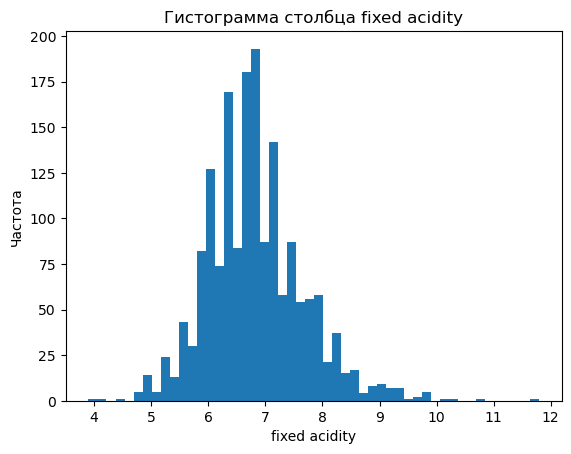

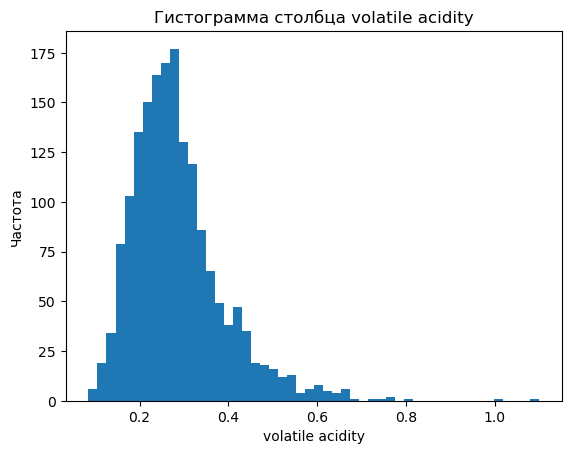

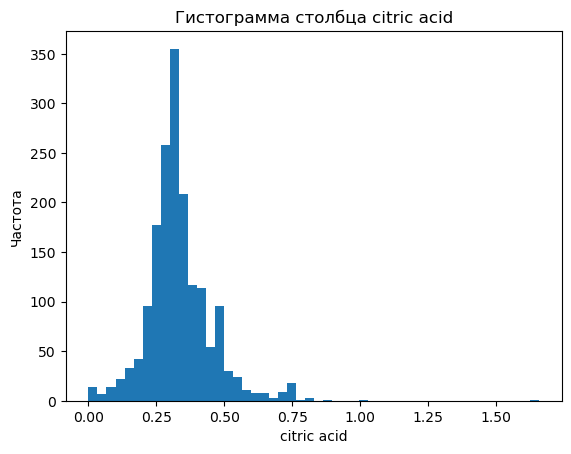

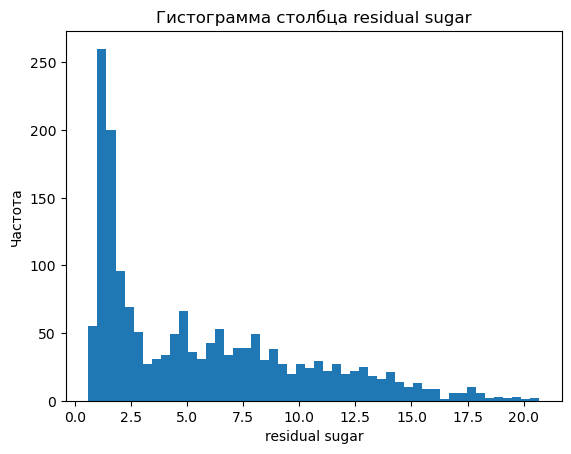

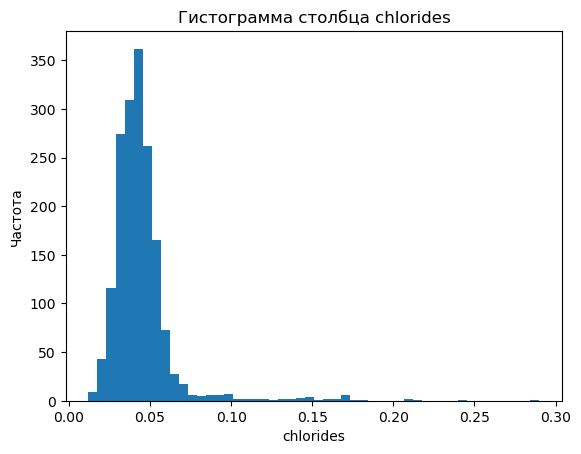

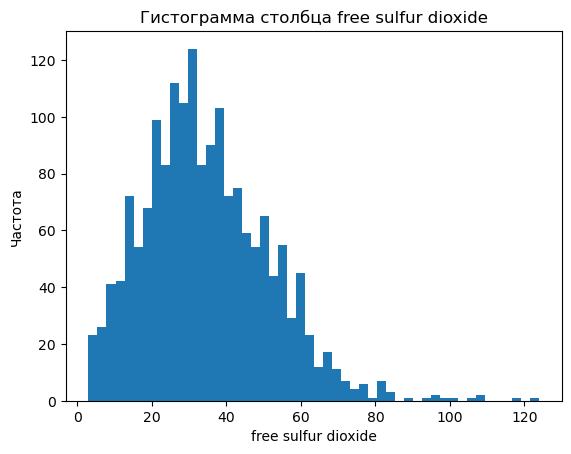

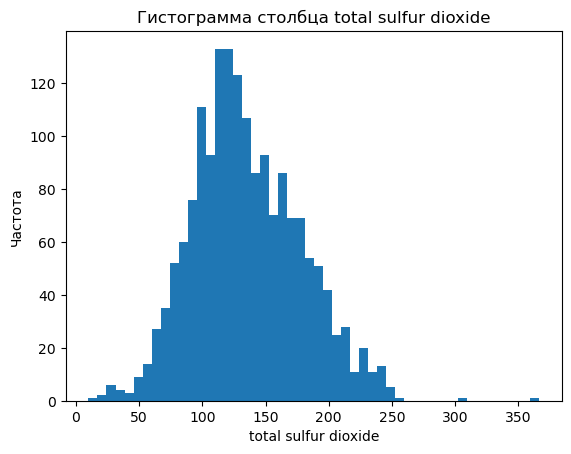

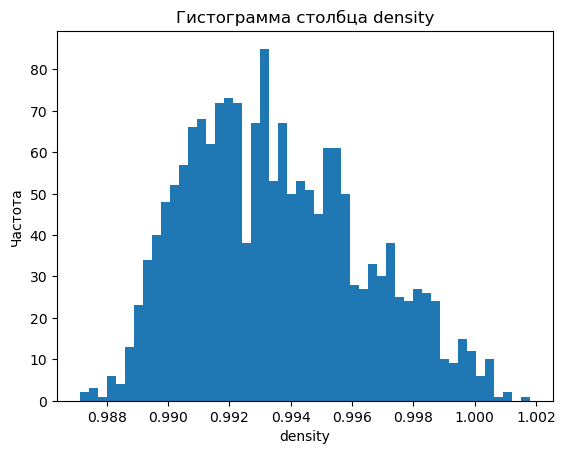

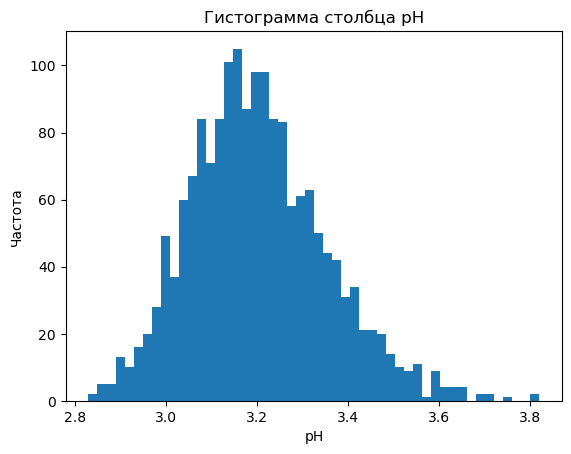

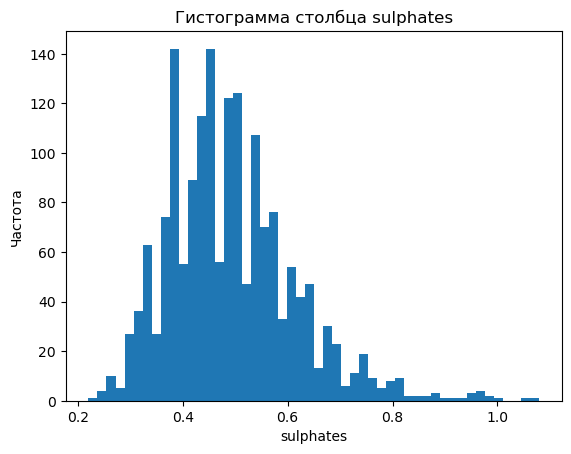

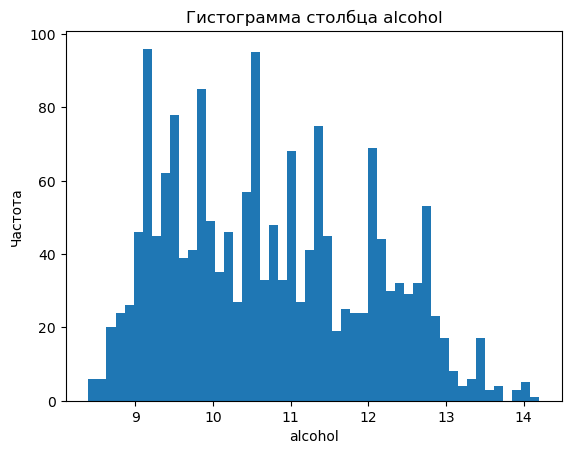

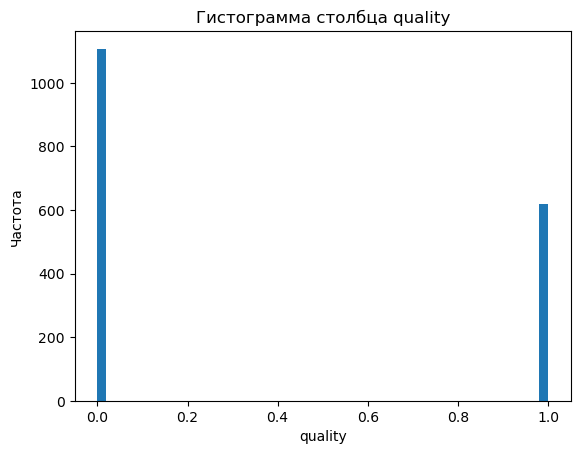

In [8]:
#строим гистограммы для каждого столбца таблицы
def plot_histogram(df, fixed_acidity, num_bins=50):
    plt.hist(df[fixed_acidity], bins=num_bins)
    plt.xlabel(fixed_acidity)
    plt.ylabel("Частота")
    plt.title(f"Гистограмма столбца {fixed_acidity}")
    plt.show()
for column in df.columns:
    plot_histogram(df, column)

In [17]:
X = df.drop(['quality'], axis = 1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

print("X_train",X_train.shape )
print("y_train",y_train.shape )
print("X_test",X_test.shape )
print("y_test",y_test.shape )

X_train (1293, 11)
y_train (1293,)
X_test (432, 11)
y_test (432,)


# Самая простая модель

In [18]:
knn = KNeighborsClassifier(n_neighbors=4,)
knn.fit(X_train, y_train)

sc_train = knn.score(X_train , y_train)
sc_test = knn.score(X_test , y_test)


print("тренировочный: {:.3f}".format(sc_train))
print("тестовый: {:.3f}".format(sc_test))

тренировочный: 0.776
тестовый: 0.701


# Пересмаштабированние 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)       

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)   


knn = KNeighborsClassifier(n_neighbors=19) # из графика ниже
knn.fit(X_train_scaled, y_train)

sc_train = knn.score(X_train_scaled , y_train)
sc_test =  knn.score(X_test_scaled ,  y_test)

print("тренировочный: {:.3f}".format(sc_train))
print("тестовый: {:.3f}".format(sc_test))

тренировочный: 0.780
тестовый: 0.773


# Поиск лучшей модели и параметров

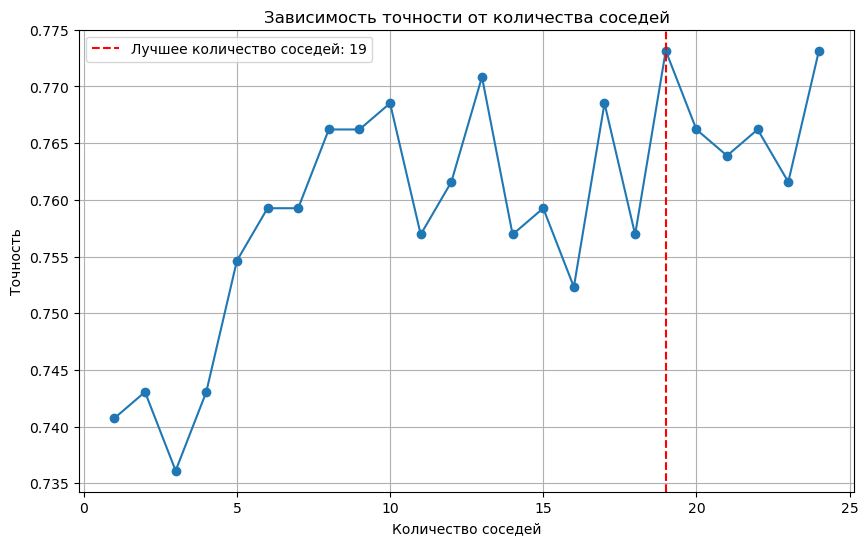

Лучшее количество соседей: 19
Наилучшая точность: 0.77


In [23]:
accuracy_scores = []
neighbors_range = range(1, 25)
best_accuracy = 0
best_n_neighbors = 0

# Перебериаем разное количество соседей
for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n_neighbors

plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, accuracy_scores, marker='o', linestyle='-')
plt.title('Зависимость точности от количества соседей')
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.axvline(x=best_n_neighbors, color='r', linestyle='--', label=f'Лучшее количество соседей: {best_n_neighbors}')
plt.legend()

plt.grid(True)
plt.show()

print(f'Лучшее количество соседей: {best_n_neighbors}')
print(f'Наилучшая точность: {best_accuracy:.2f}')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [27]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

kfold = KFold(n_splits=10, shuffle=True, random_state = 42)

scaling = [MinMaxScaler(), StandardScaler(), RobustScaler(), Normalizer()]

param_grid = [
    {
        'preprocessing': scaling,
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': np.arange(1, 25),
        'classifier__weights': ['uniform', 'distance'],
        'classifier__p': [1, 2, 3, 4, 5]
    },
    {
        'preprocessing': scaling,
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l1'],
        'classifier__solver': ['liblinear', 'saga'] 
    },
    {
        'preprocessing': scaling,
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 
    },
    {
        'preprocessing': scaling,
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['none'],
        'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'] 
    },
    {
        'preprocessing': scaling,
        'classifier': [GaussianNB()]
    },
]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid.fit(X_train,y_train)
grid

C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn

C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\

C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\

C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mvl20\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                          'classifier__p': [1, 2, 3, 4, 5],
                          'classifie...
                                            RobustScaler(), Normalizer()]},
                         {'classifier': [LogisticRegression()],
                          'classifier__penalty': ['none'],
                          'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                 'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'classifier': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [28]:
print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 19, 'classifier__p': 3, 'classifier__weights': 'distance', 'preprocessing': MinMaxScaler()}

Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.764150

Правильность для наилучшей модели на тестовом наборе: 0.759259



In [29]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,740,956,900,976,970,974,940,932,717,948,...,15,55,963,967,971,975,983,987,979,1007
mean_fit_time,0.012664,0.011233,0.012213,0.015655,0.021702,0.026748,0.013016,0.01385,0.01009,0.010898,...,0.004688,0.010523,0.029184,0.024075,0.014046,0.029276,0.023302,0.025537,0.014357,0.013075
std_fit_time,0.003298,0.003897,0.003714,0.002997,0.002766,0.003497,0.002877,0.002339,0.004763,0.003775,...,0.000457,0.000735,0.010245,0.019787,0.001723,0.003695,0.004171,0.00383,0.002081,0.001773
mean_score_time,0.113502,0.080988,0.104988,0.005388,0.002567,0.00519,0.117747,0.017007,0.100483,0.079711,...,0.003044,0.007697,0.003466,0.00271,0.002827,0.005612,0.005938,0.005728,0.005782,0.006425
std_score_time,0.024605,0.028195,0.029801,0.001226,0.000827,0.000655,0.013527,0.002375,0.036015,0.026581,...,0.000153,0.001309,0.00089,0.000778,0.000421,0.001292,0.001554,0.001108,0.000976,0.000992
param_classifier,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),LogisticRegression(),LogisticRegression(),LogisticRegression(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),...,KNeighborsClassifier(),KNeighborsClassifier(),LogisticRegression(),LogisticRegression(),LogisticRegression(),LogisticRegression(),LogisticRegression(),LogisticRegression(),LogisticRegression(),GaussianNB()
param_classifier__n_neighbors,19,24,23,NaN,NaN,NaN,24,24,18,24,...,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_classifier__p,3,5,3,NaN,NaN,NaN,3,2,5,4,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_classifier__weights,distance,distance,distance,NaN,NaN,NaN,distance,distance,distance,distance,...,distance,distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),...,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
param_classifier__penalty,NaN,NaN,NaN,l2,l2,l2,NaN,NaN,NaN,NaN,...,NaN,NaN,l1,l1,l2,l2,l2,l2,l2,NaN


In [32]:
y_pred = grid.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC:', roc_auc)
print(classification_report(y_test, grid.predict(X_test)))

ROC AUC: 0.7243030941661079
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       286
           1       0.65      0.62      0.63       146

    accuracy                           0.76       432
   macro avg       0.73      0.72      0.73       432
weighted avg       0.76      0.76      0.76       432



In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

fin_pipe =  Pipeline([
            ('preprocessing', MinMaxScaler()), 
            ('classifier', KNeighborsClassifier(n_neighbors = 19, p = 3, weights = 'distance'))
            ])
fin_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=19, p=3,
                                      weights='distance'))])

In [69]:
fin_pipe.score(X_train,y_train)

1.0

In [70]:
fin_pipe.score(X_test,y_test)

0.8078703703703703